<a href="https://colab.research.google.com/github/Cyp202/2025_Intro_Python/blob/main/notebook/W4_S2_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Graphics with Seaborn

References:
1. Python Data Science Handbook (https://www.oreilly.com/library/view/python-data-science/9781491912126/)
2. mlcourse.ai (https://mlcourse.ai/book/topic02/topic02_additional_seaborn_matplotlib_plotly.html)
3. DataCamp data-science and machine learning courses (https://github.com/ozlerhakan/datacamp)

logo-wide-lightbg.svg

## Seaborn Versus Matplotlib

Here is an example of a simple random-walk plot in Matplotlib, using its standard plot formatting and colors.

We will show that using simple settings arguments, we can create aesthetically pleasing plots with the [`seaborn`](https://seaborn.pydata.org/) library.

In [31]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

First, let's create some data and plot them with matplotlib defaults.

In [32]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

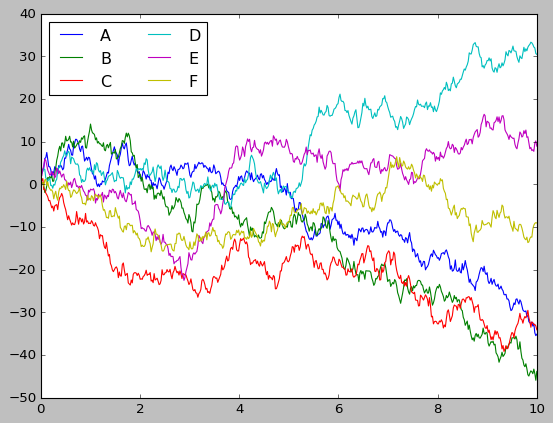

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

This is what we get from `Matplotlib` without changing any settings. It's okay, but the color code and background look underwhelming. Can we do better?

Importing `seaborn` brings a lot of good. While you can use `seaborn` plotting functions, simply importing the package will overwrite a lot of the default settings in the `Matplotlib` library.

So simply rerunning the exact same `Matplotlib` script will yield a better figure!

In [4]:
import seaborn as sns
sns.set()

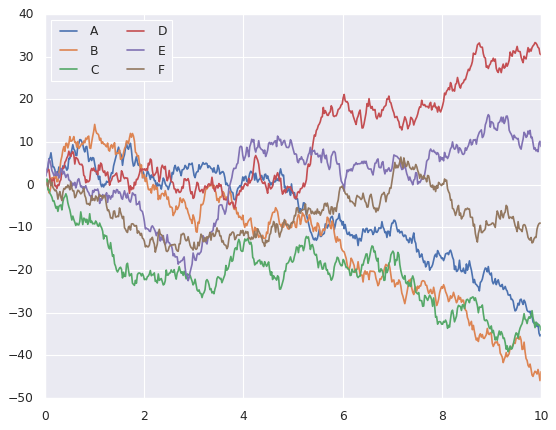

In [5]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Exploring Datasets with `seaborn`

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

Let's download school data from the US using [pooch](https://pypi.org/project/pooch/).

In [6]:
import pooch
import pandas as pd
url = "https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/EdQySMPw8KlEq9QjqSpSeVsBreCRvf_vK1dmTBNelRfWAQ?download=1"
schoolimprov_2010grants = pooch.retrieve(url, known_hash='0cb062b892eff47098c6900f7e9ab1664d448c80e2197584617c249c9919dda4')

In [7]:
df = pd.read_csv(schoolimprov_2010grants)
df.head()

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West
3,3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,Transformation,641184,West
4,4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,399686,West


Here we opened a tabular file containing names and location of some schools in the US. The table also contains information on how much grant money individual schools got in 2010.

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib.

First, let's pull out schools in Southern and Western US from the table.

In [8]:
isWEST,isSOUTH = df['Region']=='West',df['Region']=='South'
dfWEST,dfSOUTH = df[isWEST],df[isSOUTH]

In Matplotlib, we may e.g., use the [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function of the Pyplot package

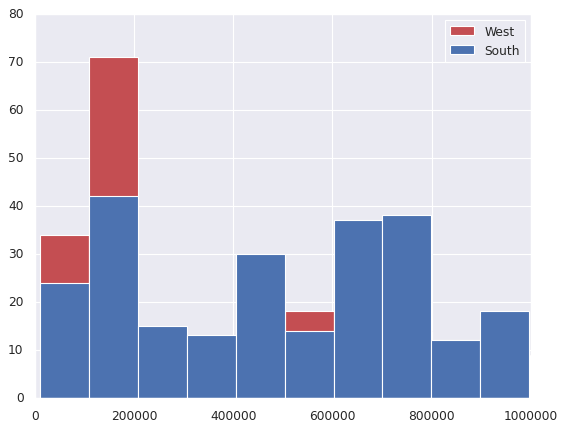

In [9]:
colors=['r','b']
labels = ['West','South']
for ind,obj in enumerate([dfWEST,dfSOUTH]):
  plt.hist(obj['Award_Amount'], color=colors[ind],label=labels[ind])
plt.legend()

Seaborn already made it look much nicer. But it can easily do more, including density estimates and automatic labeling, as demonstrated below:

/tmp/ipython-input-3398559142.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(obj['Award_Amount'], shade=True,color=colors[ind],label=labels[ind])
/tmp/ipython-input-3398559142.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(obj['Award_Amount'], shade=True,color=colors[ind],label=labels[ind])


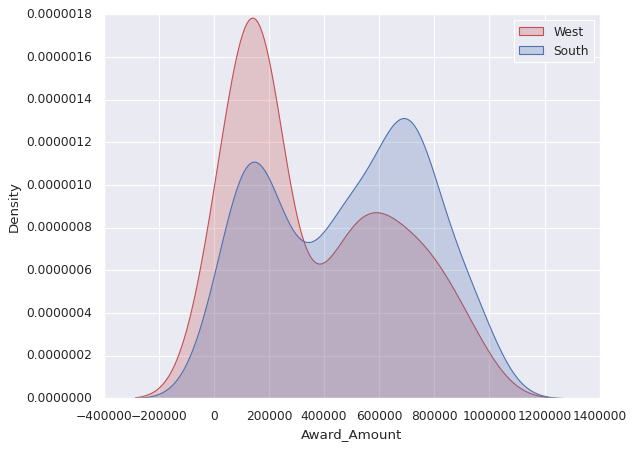

In [10]:
for ind,obj in enumerate([dfWEST,dfSOUTH]):
  sns.kdeplot(obj['Award_Amount'], shade=True,color=colors[ind],label=labels[ind])
plt.legend(loc=1)
plt.show()

### KDE

We just used `seaborn` to plot the distribution functions of the amount of grant money received the two different categories of schools we just pull out.

Here we used the [`kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) function to get a kernel density estimate (KDE) plot. This kind of plot is analogous to histograms, but the distributions is quite smooth. This is because `seaborn` will try to find a function that best represent the continuous probability density function (PDF) of a given dataset, rather than simply counting the number of data in each data bin.

From the `seaborn` official website:

*Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth. Like a histogram, the quality of the representation also depends on the selection of good smoothing parameters.*

We can change how our plot looks like



/tmp/ipython-input-2124947624.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(obj['Award_Amount'], shade=False,ax=ax,
/tmp/ipython-input-2124947624.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(obj['Award_Amount'], shade=False,ax=ax,


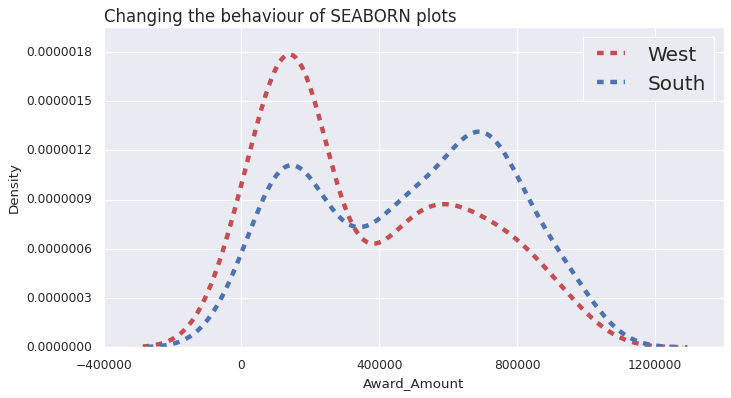

In [11]:
fig,ax = plt.subplots(figsize=(10,5))
for ind,obj in enumerate([dfWEST,dfSOUTH]):
  sns.kdeplot(obj['Award_Amount'], shade=False,ax=ax,
              color=colors[ind],label=labels[ind],
              linestyle='--',linewidth=4)
plt.legend(loc=1,prop={'size':18})
plt.xticks([-400000,0,400000,800000,1200000])
plt.yticks(np.linspace(0,0.0000018,7))
plt.ylim(0,0.00000195)
plt.title('Changing the behaviour of SEABORN plots',loc='left',fontsize=15)
plt.show()

It is much easier to read now!

Let's combine a histogram using [``histplot``](https://seaborn.pydata.org/generated/seaborn.histplot.html) with a KDE plot using [``kdeplot``](https://seaborn.pydata.org/generated/seaborn.kdeplot.html):

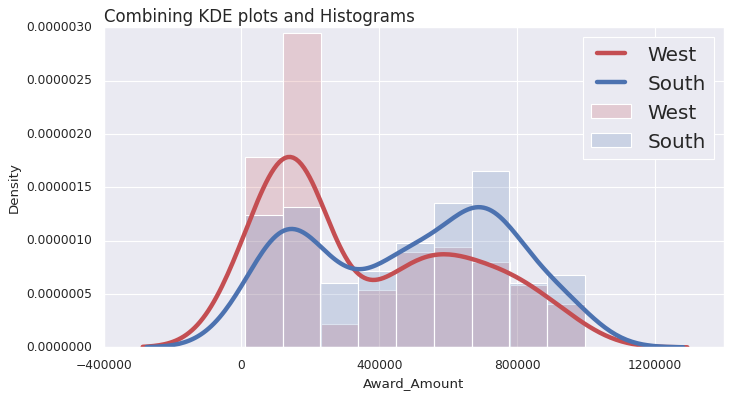

In [12]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
for ind,obj in enumerate([dfWEST,dfSOUTH]):
  sns.histplot(obj['Award_Amount'],ax=ax,stat='density',
               color=colors[ind],label=labels[ind],
               alpha=0.2,
               kde_kws={'linestyle':'-','linewidth':4})
  sns.kdeplot(obj['Award_Amount'],ax=ax,
              color=colors[ind],label=labels[ind],
              linewidth=4)
plt.legend(loc=1,prop={'size':18})
plt.xticks([-400000,0,400000,800000,1200000])
plt.title('Combining KDE plots and Histograms',loc='left',fontsize=15)
plt.show()

/tmp/ipython-input-929049901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(obj['Award_Amount'],kde=False,ax=ax,color=colors[ind],


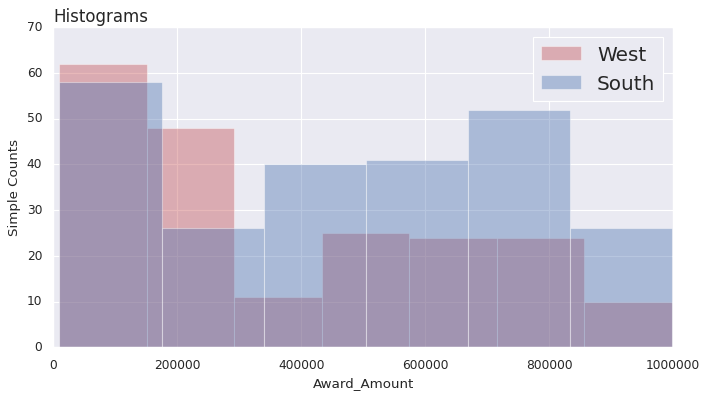

In [13]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
for ind,obj in enumerate([dfWEST,dfSOUTH]):
  sns.distplot(obj['Award_Amount'],kde=False,ax=ax,color=colors[ind],
               label=labels[ind],kde_kws={'linestyle':'-','linewidth':4})
plt.legend(loc=1,prop={'size':18})
plt.title('Histograms',loc='left',fontsize=15)
plt.ylabel('Simple Counts')
plt.show()

/tmp/ipython-input-3490728237.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfWEST['Award_Amount'],ax=ax,color='r',label='West',
/usr/local/lib/python3.12/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


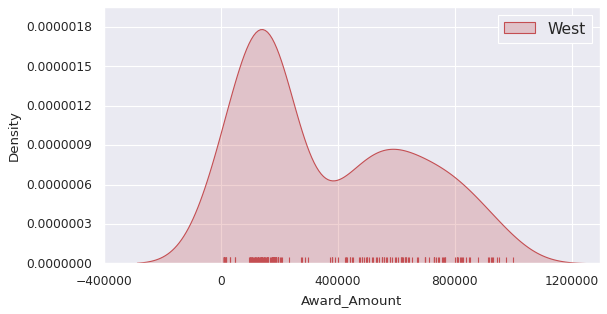

In [14]:
fig,ax = plt.subplots(1,1,figsize=(8,4))
sns.distplot(dfWEST['Award_Amount'],ax=ax,color='r',label='West',
             hist=False,rug=True,kde_kws={'shade':True})
plt.legend(loc=1,prop={'size':14})
plt.xticks([-400000,0,400000,800000,1200000])
plt.yticks(np.linspace(0,0.0000018,7))
plt.ylim(0,0.00000195)
plt.show()

If we pass the full two-dimensional dataset to ``kdeplot``, we will get a two-dimensional visualization of the data:

In [15]:
# Let's create some random, normally-distributed, 2D data
data = np.random.multivariate_normal([0, 0],
                                     [[5, 2], [2, 2]],
                                     size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

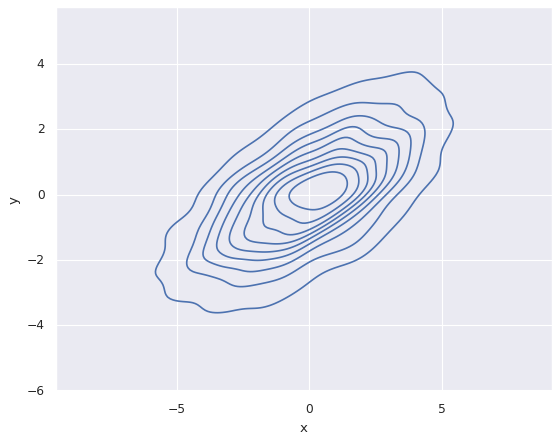

In [16]:
# And plot it
sns.kdeplot(x=data['x'],y=data['y']);

Now, a really convenient function that plots both the 2D density function as well as its 1D marginals is [`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

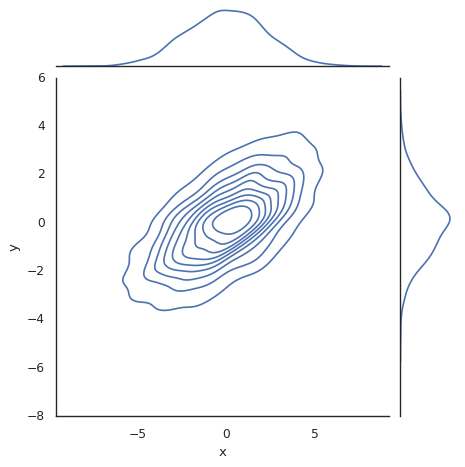

In [17]:
with sns.axes_style('white'):
    sns.jointplot(data=data,x="x",y="y",kind='kde');

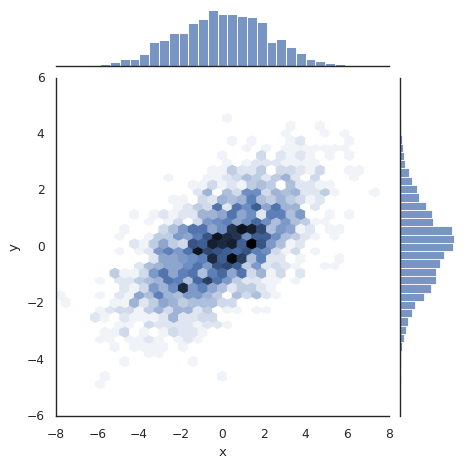

In [18]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='hex')

Click this [link](https://seaborn.pydata.org/generated/seaborn.jointplot.html) for other settings in the `jointplot()` method

Seaborn also conveniently includes statistical modeling utilities, such as its linear regression plot [`regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html):

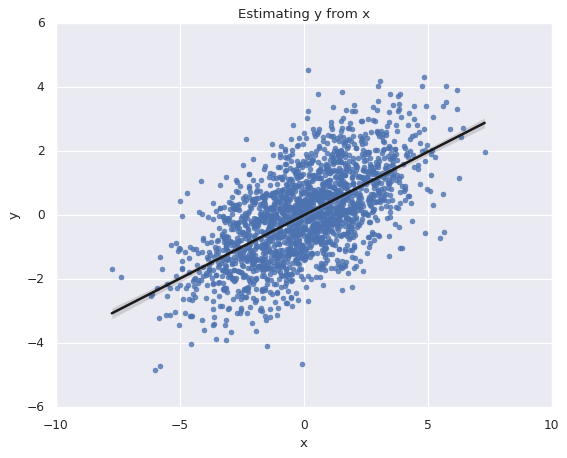

In [19]:
sns.regplot(x="x", y="y", data=data,
            scatter_kws={'color':'b'},line_kws={'color':'k'})
plt.title('Estimating y from x');

## Changing plotting styles in Seaborn: Faceted histograms

Sometimes the best way to visualize data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

Check this [page](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for detailed documentation of the ``FacetGrid`` method.

In [20]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


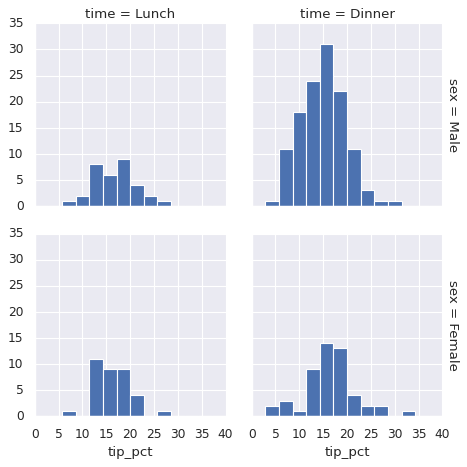

In [21]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## Catplots

[Catplots](https://seaborn.pydata.org/generated/seaborn.catplot.html) can be useful for this kind of visualization as well as they relate a numerical variable to one or more categorical variables. In plain words, they allow you to see how a parameter is distributed as a function of any other parameter, even if one parameter is a number and the other one is a category:

### Boxplots

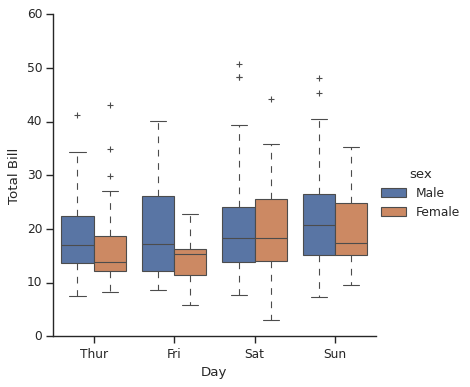

In [22]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day",y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Bar plots

Time series can also be plotted using ``sns.catplot`` by simply changing the argument from . In the following example, we'll use the Planets data introduced three weeks ago.

In [23]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


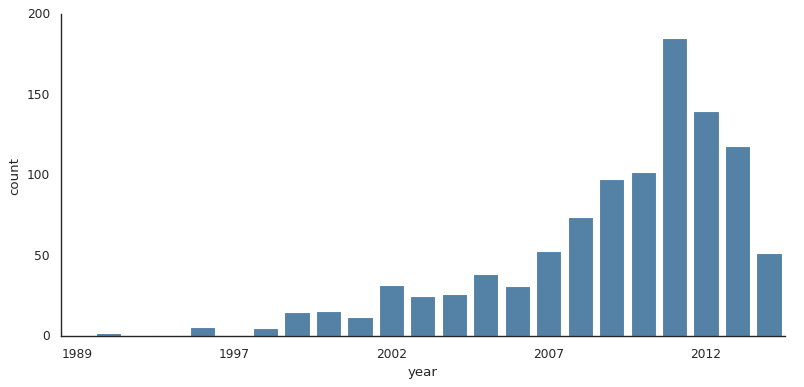

In [24]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                    kind="count", color='steelblue')
    g.set_xticklabels(step=5)

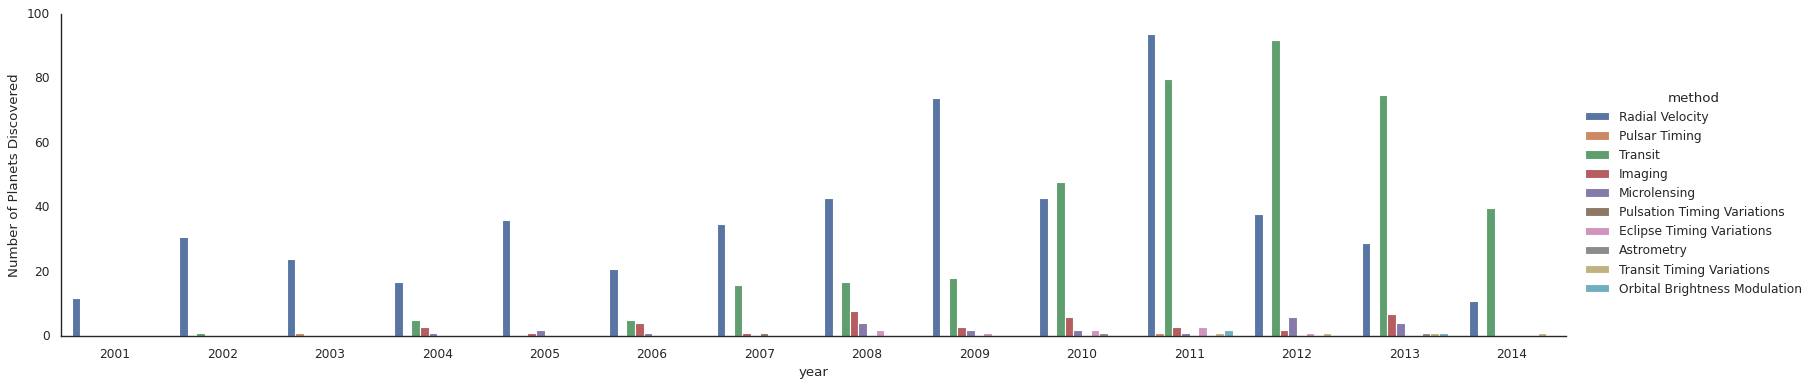

In [25]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                    hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## Heat Maps

The last type of plot that we will cover here is heat maps. A heat map produces a color-encoded matrix that allows the visualization of a numerical variable's distribution over two other variables, that may be continuous or categorical.

The documentation for heatmap function in `seaborn` can be found [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap).

In [26]:
url = "https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/EQI2SUuxc4FGuvhKuTpcqSsBG5aBYu-ASatoT-EEuaN3ng?download=1"
dailyshow_guests = pooch.retrieve(url, known_hash='af71277309a9f35a925312c4c55f5d9ac430c803b6ea71da5ea26a2f5d4d51d6')
df = pd.read_csv(dailyshow_guests)
df.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


In [27]:
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])
pd_crosstab

YEAR,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Group,,,,,,,,,,,,,,,,,
Academic,0,0,2,0,4,1,12,9,13,5,11,8,10,8,8,10,2
Acting,108,100,92,84,74,51,44,44,25,26,22,45,42,33,60,47,33
Advocacy,0,1,0,1,0,4,0,0,2,3,1,1,1,2,2,3,3
Athletics,0,3,1,2,0,2,2,5,4,1,7,5,2,7,4,4,3
Business,0,1,0,0,0,2,1,1,2,1,4,2,3,3,3,1,1
Clergy,0,0,0,1,1,1,0,0,1,0,1,0,1,2,0,0,0
Comedy,25,12,11,5,12,7,5,8,9,7,7,7,7,6,6,9,7
Consultant,0,0,0,0,1,4,1,4,2,3,2,1,0,0,0,0,0
Government,0,0,2,1,2,3,1,3,1,0,5,3,3,3,7,6,0


We can visualize the 2D matrix above to see the profession of Daily Show guests throughout the years.

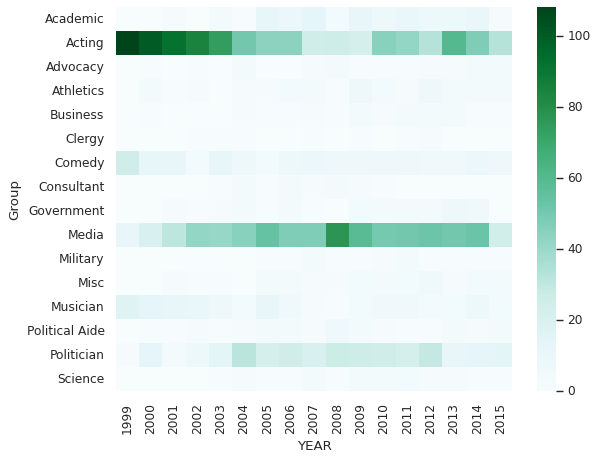

In [28]:
# Plot a heatmap of the table
sns.heatmap(pd_crosstab,cmap='BuGn')

# Rotate tick marks for visibility
plt.yticks(rotation=0);
plt.xticks(rotation=90);

We see that the show usually invites actors, media figures from 1999 to 2015. It invited slightly more politicians in 2004 and 2012, which coincided with election years.

In [29]:
url = "https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/EfG3joA129pFq8DjjZkb2c0Br-GNwxp6fYQKQkW-7YEaeg?download=1"
bikeshare = pooch.retrieve(url, known_hash='8fd1763d90d675db349964671b7d6a2499746bc999fcebc32e5f900889c78ef7')
df = pd.read_csv(bikeshare)

Here's a way to perform and visualize a correlation analysis in just a few characters using bike sharing data:

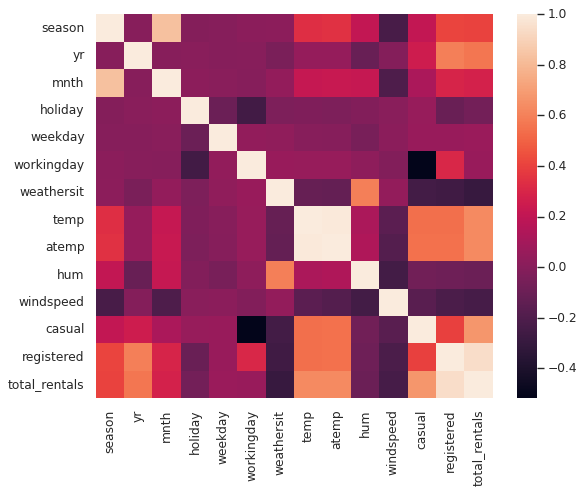

In [30]:
df_numeric = df.drop('dteday', axis=1)
sns.heatmap(df_numeric.corr());

What do you notice?